### Important discrete distributions

- Check: 
  - https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb
  - https://anaconda.org/marsgr6/discrete_distributions/notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- [Bernoulli distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#bern)

In [15]:
def bernoulli(p=0.5):
    # p: success probability P(X=1)
    # returns a value for X in {0, 1}
    return (np.random.random() < p)*1

sum([bernoulli(p=0.2) for i in range(100)])

10

- [Binomial distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#binom)
  - $$X \sim Bin(x; n, p)$$
- PMF:

  - $$P(X=x) = f_X(x; n, p) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$



<BarContainer object of 8 artists>

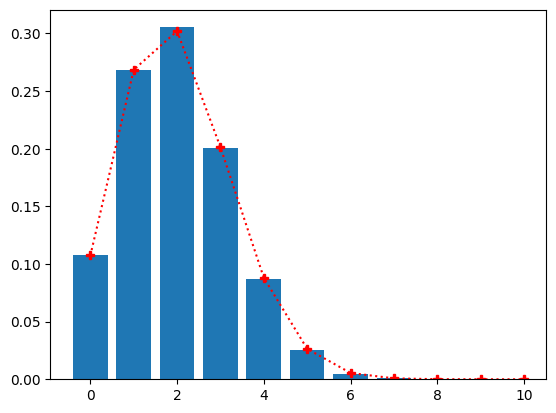

In [41]:
from scipy.special import comb

def binomial(n=1, p=0.5):
    # Perform a bernoulli experiment n times
    # n: number of bernoulli experiment repetitions
    # p: success probability P(X=1)
    # returns the sum of the n bernoulli experiments
    return np.array([bernoulli(p=p) for i in range(n)]).sum()

def binomial_pmf(x, n, p):
    # Implement the PMF above
    # returns P(X=x)
    return comb(n, x) * p**x * (1-p)**(n-x)

n = 10
p = 0.2
x = np.arange(0, n+1)
pmf_x = binomial_pmf(x, n, p)
x, pmf_x

x_rvs = [binomial(n, p) for i in range(10000)]

x_s, fx = np.unique(x_rvs, return_counts=True)
plt.plot(x, pmf_x, ':Pr')
plt.bar(x_s, fx/fx.sum())

- [Geometric distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#geom)

<BarContainer object of 12 artists>

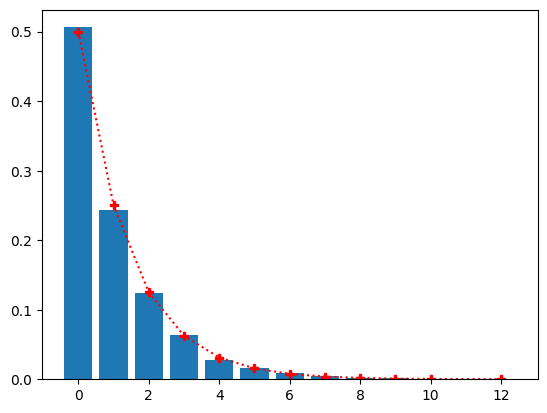

In [51]:
from scipy.stats import geom

def geometric(p=0.5):
    # Repeats a bernoulli experiment until a success
    # p: success probability P(X=1)
    # returns the number of failures before the success
    x = 0
    while not bernoulli(p):
        x += 1
    return x

p = 0.5
x_rvs = [geometric(p) for i in range(10000)]
x_s, fx = np.unique(x_rvs, return_counts=True)
plt.plot(x_s, geom.pmf(x_s+1, p), ':Pr')
plt.bar(x_s, fx/fx.sum())

- [Negative binomial distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#geom)

<BarContainer object of 25 artists>

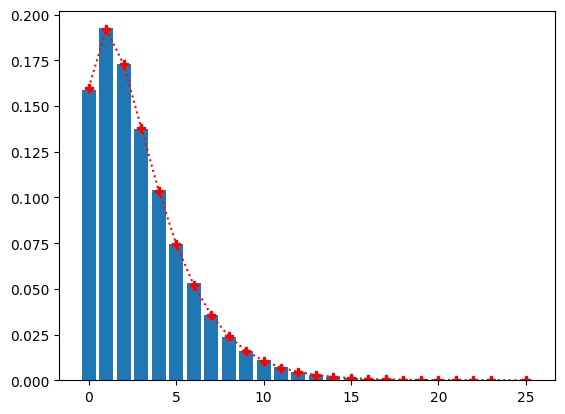

In [64]:
from scipy.stats import nbinom


def negative_binomial(r=1, p=0.5):
    # Extends the geometric distribution, now stop at the rth success
    # r: number of success 
    # returns the number of failures before the rht success
    x = 0
    for i in range(r):
        x += geometric(p)

    return x

r = 2
p = 0.4
x_rvs = [negative_binomial(r, p) for i in range(100000)]
x_s, fx = np.unique(x_rvs, return_counts=True)
plt.plot(x_s, nbinom.pmf(x_s, r, p), ':Pr')
plt.bar(x_s, fx/fx.sum())

- [Poisson distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#poiss)



$$f_X(x; \lambda) = \frac{e^{-\lambda} \lambda^x}{x!},\ x \in \{0, 1, 2, \dots\}$$

<BarContainer object of 11 artists>

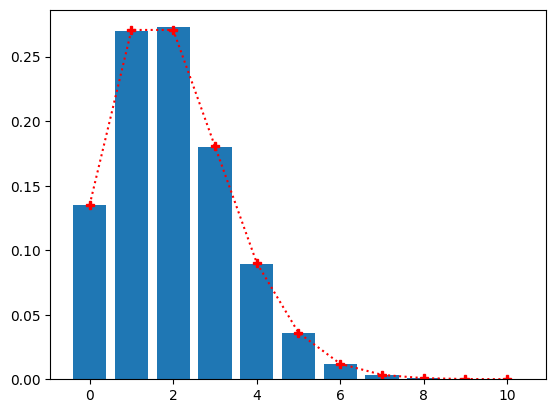

In [65]:
from scipy.stats import poisson

def poiss(lam=1):
    # lambda: sucess rate
    # returns the number of successes in a particular continous region
    u = np.random.random()
    cp = np.exp(-lam)
    x = 0
    factorial_x = 1
    while cp < u:
        x = x + 1
        factorial_x = factorial_x * x
        cp = cp + np.exp(-lam) * lam**x / factorial_x

    return x

lam = 2    
x_rvs = [poiss(lam) for i in range(100000)]
x_s, fx = np.unique(x_rvs, return_counts=True)
plt.plot(x_s, poisson.pmf(x_s, lam), ':Pr')
plt.bar(x_s, fx/fx.sum())

- [Hypergeometric distribution](https://nbviewer.org/github/marsgr6/EN-online/blob/main/discrete_distributions.ipynb#hg)

  - Descibes the probability of getting $k$ successes from ($K$ success objects), in a random sample of size $n$ from $N$ total objects, without replacement.
  - In the figure below, $K=6$ success items, (white balls in the original urn), the sample size is $n=5$, from $N=10$ total balls in the urn. The number of successes (white balls) in the sample is $k=3$.

![](https://i.imgur.com/jGp0QIZ.png)

<BarContainer object of 5 artists>

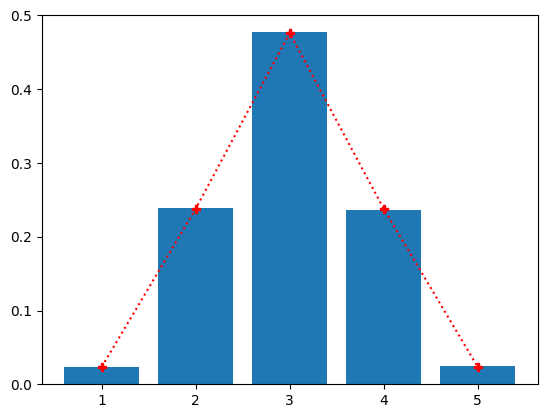

In [74]:
from scipy.stats import hypergeom

n = 5  # muestra
b = 4  # 4 blacks
w = 6  # 6 whites
urna = [0]*b + [1]*w

x_rvs = []

for i in range(10000):
    np.random.shuffle(urna)
    x_rvs += [sum(urna[:n])]


x_s, fx = np.unique(x_rvs, return_counts=True)
plt.plot(x_s, hypergeom.pmf(x_s, M=b+w, n=w, N=n), ':Pr')
plt.bar(x_s, fx/fx.sum())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>